In [1]:
import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin-1')
display(df.head())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df.info()
print(df.isnull().sum())
print(df['v1'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
v1
ham     4825
spam     747
Name: count, dtype: int64


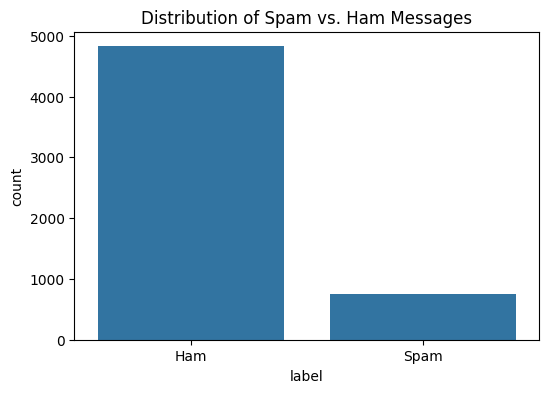

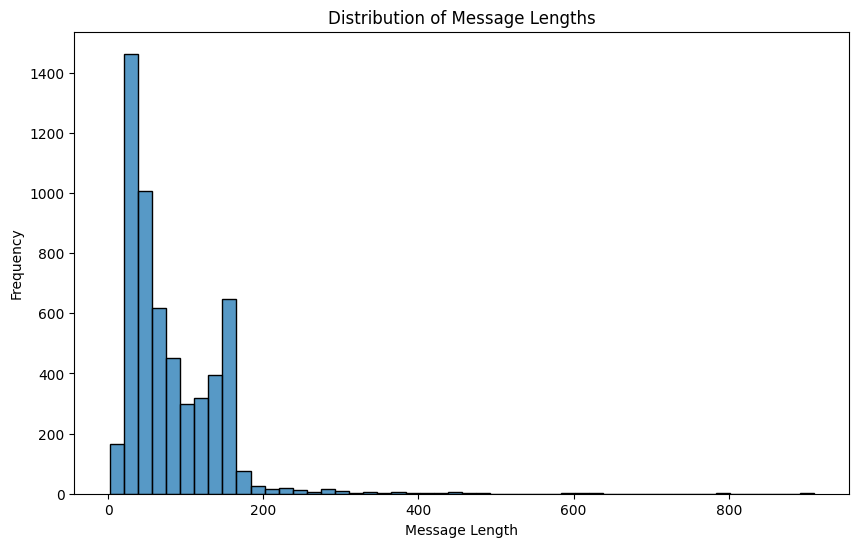

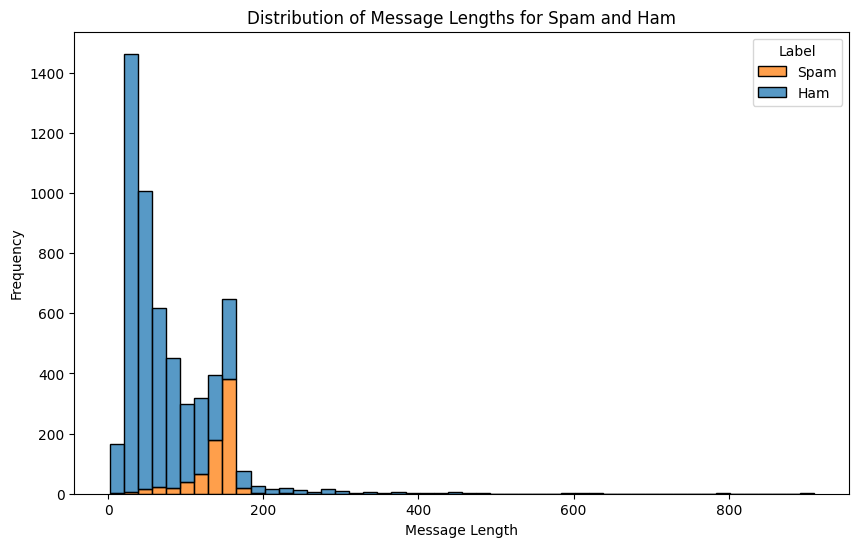

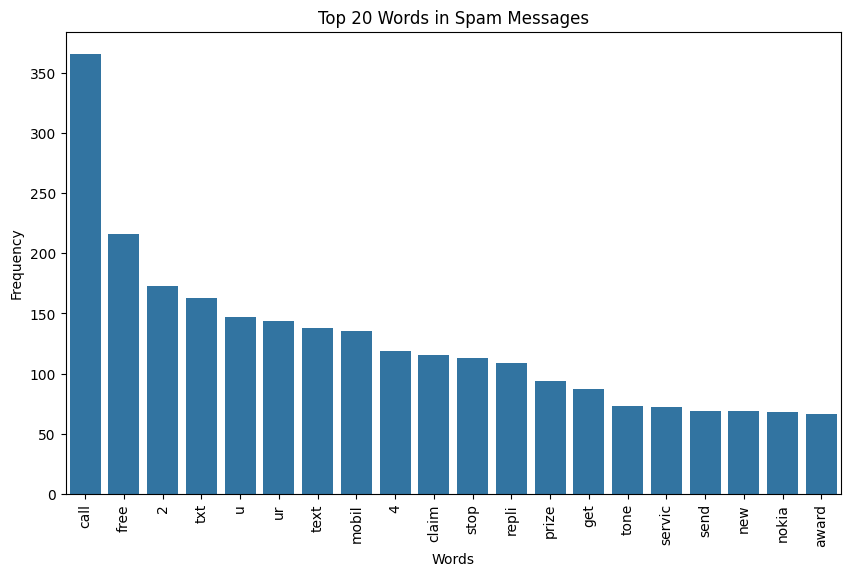

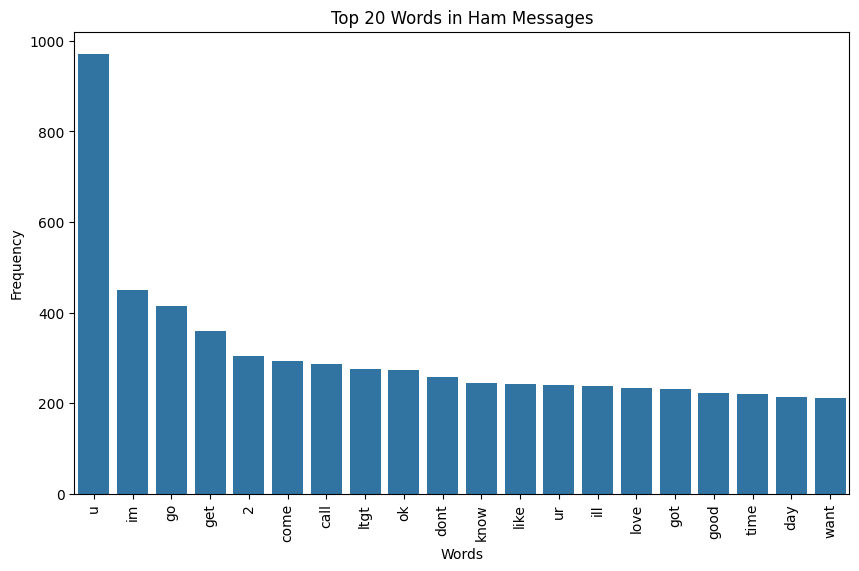

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs. Ham Messages')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

# Plot message length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Plot message length distribution for spam and ham
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, multiple="stack")
plt.title('Distribution of Message Lengths for Spam and Ham')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(title='Label', labels=['Spam', 'Ham'])
plt.show()

# Get top 20 words in spam messages
spam_messages = df[df['label'] == 1]['message'].str.split(expand=True).stack().tolist()
spam_word_counts = Counter(spam_messages)
top_spam_words = spam_word_counts.most_common(20)

# Plot top 20 words in spam messages
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, count in top_spam_words], y=[count for word, count in top_spam_words])
plt.title('Top 20 Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Get top 20 words in ham messages
ham_messages = df[df['label'] == 0]['message'].str.split(expand=True).stack().tolist()
ham_word_counts = Counter(ham_messages)
top_ham_words = ham_word_counts.most_common(20)

# Plot top 20 words in ham messages
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, count in top_ham_words], y=[count for word, count in top_ham_words])
plt.title('Top 20 Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [3]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df['message_length'] = df['message'].apply(len)

df['message'] = df['message'].str.lower()

df['message'] = df['message'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

stopwords_set = set(stopwords.words('english'))
df['message'] = df['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_set]))

stemmer = PorterStemmer()
df['message'] = df['message'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

display(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,label,message,message_length
0,0,go jurong point crazi avail bugi n great world...,111
1,0,ok lar joke wif u oni,29
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155
3,0,u dun say earli hor u c alreadi say,49
4,0,nah dont think goe usf live around though,61


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['message'])

In [5]:
from sklearn.model_selection import train_test_split

X = tfidf_features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9390
Precision: 0.9649
Recall: 0.5759
F1-score: 0.7213


In [8]:
new_messages = [
    "Congratulations! You've won a free iPhone!",
    "Hey, how are you doing today?",
    "Get rich quick! Click here!",
    "Meeting at 3 PM tomorrow."
]

new_messages_transformed = tfidf_vectorizer.transform(new_messages)

predictions = model.predict(new_messages_transformed)

for message, prediction in zip(new_messages, predictions):
    label = "spam" if prediction == 1 else "ham"
    print(f"Message: '{message}' -> Predicted Label: {label}")

Message: 'Congratulations! You've won a free iPhone!' -> Predicted Label: ham
Message: 'Hey, how are you doing today?' -> Predicted Label: ham
Message: 'Get rich quick! Click here!' -> Predicted Label: ham
Message: 'Meeting at 3 PM tomorrow.' -> Predicted Label: ham


## Summary:

### Data Analysis Key Findings

*   The initial dataset contained 5572 entries with columns 'v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4'.
*   Significant missing values were present in columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4'.
*   The dataset exhibits a class imbalance in the 'v1' column, with 4825 'ham' instances and 747 'spam' instances.
*   The text data was preprocessed by dropping unnecessary columns, renaming relevant ones to 'label' and 'message', converting the 'label' to a numerical representation (0 for 'ham', 1 for 'spam'), calculating message length, converting text to lowercase, removing punctuation and stopwords, and applying stemming.
*   TF-IDF vectorization was used to convert the preprocessed text data into numerical features.
*   The dataset was split into training and testing sets with a test size of 25%.
*   A Logistic Regression model was trained on the training data.
*   Model evaluation on the test set yielded an accuracy of approximately 0.9390, a precision of around 0.9649, a recall of approximately 0.5759, and an F1-score of around 0.7213.
*   The trained model was used to predict labels for new messages, which were all predicted as "ham" for the provided examples.

### Insights or Next Steps

*   The class imbalance in the dataset is significant and likely impacts the model's performance, particularly recall. Techniques to address class imbalance, such as oversampling the minority class or undersampling the majority class, could be explored in future steps.
*   While precision is high, the low recall indicates the model is missing a substantial number of spam messages. Further model tuning, experimenting with different algorithms, or incorporating additional features could help improve recall.
